In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt
from numpy import log
from matplotlib import pyplot
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [3]:
data.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
YearsExperience,0.37956,-1.012212
Salary,0.35412,-1.295421


# Visualizations for Years of Experience

In [4]:
data['YearsExperience'].describe()

count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: YearsExperience, dtype: float64

<AxesSubplot:>

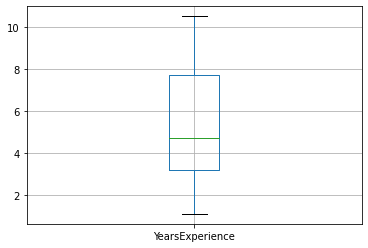

In [5]:
data.boxplot(column= ['YearsExperience'])

C:\Users\uniha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

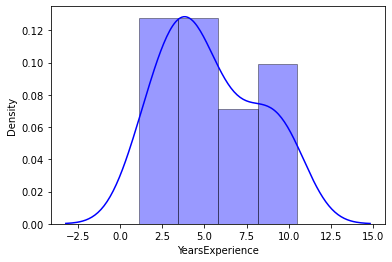

In [6]:
import seaborn as sns
sns.distplot(data['YearsExperience'], color='blue',hist_kws =dict(edgecolor = 'black'))

# Log and sq transformation for Years of experience

In [7]:
#create log-transformed data
data_log1 = np.log(data['YearsExperience'])

Text(0.5, 1.0, 'Log-Transformed Years of Experience')

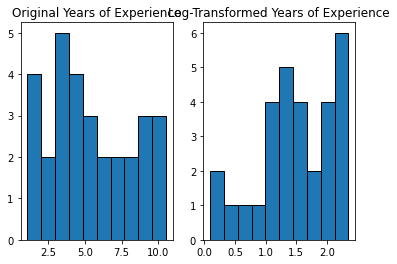

In [8]:
#define grid of plots
fig, axs_log1 = plt.subplots(nrows=1, ncols=2)

#create histograms
axs_log1[0].hist(data['YearsExperience'], edgecolor='black')
axs_log1[1].hist(data_log1, edgecolor='black')

#add title to each histogram
axs_log1[0].set_title('Original Years of Experience')
axs_log1[1].set_title('Log-Transformed Years of Experience')

In [9]:
data_sqrt1 = np.sqrt(data['YearsExperience'])

Text(0.5, 1.0, 'Square Root Transformed Years of Experience')

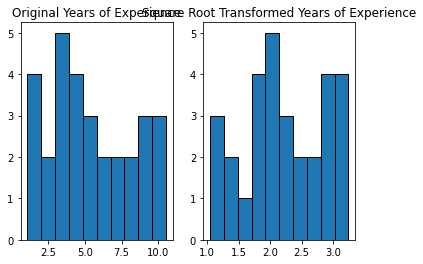

In [10]:
#define grid of plots
fig, axs_sq1 = plt.subplots(nrows=1, ncols=2)

#create histograms
axs_sq1[0].hist(data['YearsExperience'], edgecolor='black')
axs_sq1[1].hist(data_sqrt1, edgecolor='black')

#add title to each histogram
axs_sq1[0].set_title('Original Years of Experience')
axs_sq1[1].set_title('Square Root Transformed Years of Experience')

# Visualizations for Salary

In [11]:
data['Salary'].describe()

count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: Salary, dtype: float64

C:\Users\uniha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

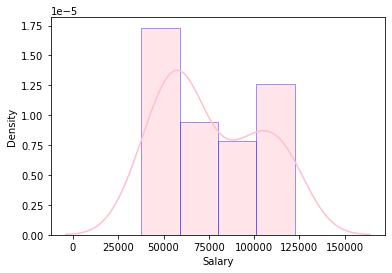

In [12]:
sns.distplot(data['Salary'], color='pink',hist_kws =dict(edgecolor = 'blue'))

<AxesSubplot:>

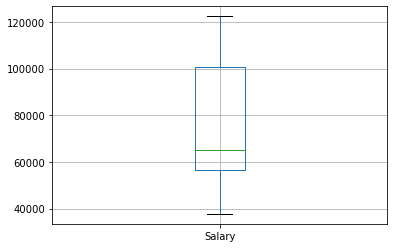

In [13]:
data.boxplot(column= ['Salary'])

No outliers in the data

# Log and sq transformation for Salary

In [14]:
#create log-transformed data
data_log2 = np.log(data['Salary'])

Text(0.5, 1.0, 'Log-Transformed Salary')

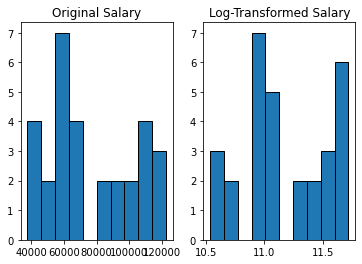

In [15]:
#define grid of plots
fig, axs_log2 = plt.subplots(nrows=1, ncols=2)

#create histograms
axs_log2[0].hist(data['Salary'], edgecolor='black')
axs_log2[1].hist(data_log2, edgecolor='black')

#add title to each histogram
axs_log2[0].set_title('Original Salary')
axs_log2[1].set_title('Log-Transformed Salary')

In [16]:
data_sqrt2 = np.sqrt(data['Salary'])

Text(0.5, 1.0, 'Square Root Transformed Salary')

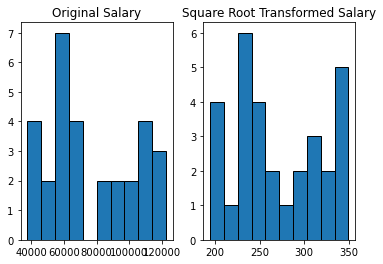

In [17]:
#define grid of plots
fig, axs_sq2 = plt.subplots(nrows=1, ncols=2)

#create histograms
axs_sq2[0].hist(data['Salary'], edgecolor='black')
axs_sq2[1].hist(data_sqrt2, edgecolor='black')

#add title to each histogram
axs_sq2[0].set_title('Original Salary')
axs_sq2[1].set_title('Square Root Transformed Salary')

# Correlation

Text(0, 0.5, 'Salary')

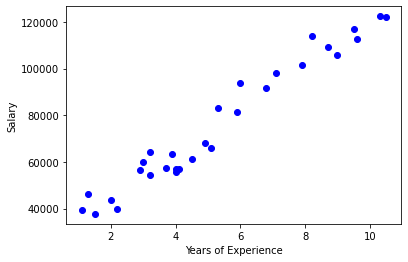

In [18]:
plt.plot(data.YearsExperience,data.Salary,"bo");plt.xlabel("Years of Experience");plt.ylabel("Salary")

In [19]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


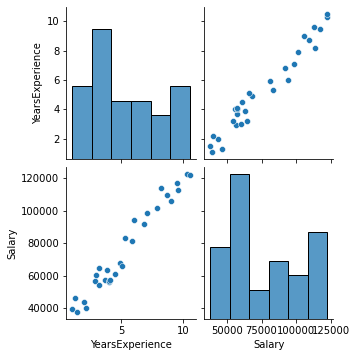

In [20]:
sns.pairplot(data)

# Fitting the model

In [21]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = data).fit()

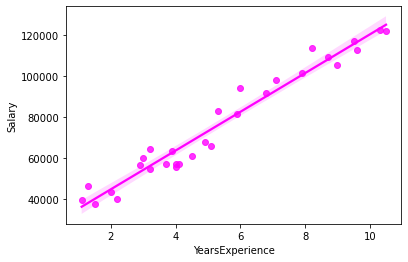

In [22]:
sns.regplot(x="YearsExperience", y="Salary", data=data, color= 'magenta');

In [23]:
#Coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [24]:
#Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           1.14e-20
Time:                        22:05:26   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [26]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

R squared value = 0.96, very good model

# Prediction 1

In [27]:
#Predict for 0.5 and 4 daily circulation
newdata1=pd.Series([0.5,4])

In [28]:
data_pred1=pd.DataFrame(newdata1,columns=['YearsExperience'])

In [29]:
pred1 = model.predict(data_pred1)
pred1

0    30517.181359
1    63592.049484
dtype: float64

ValueError: x and y must have same first dimension, but have shapes (30,) and (2,)

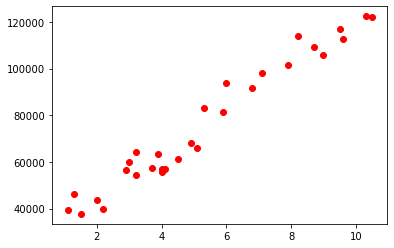

In [30]:
plt.scatter(x=data['YearsExperience'],y=data['Salary'],color='red');plt.plot(data['YearsExperience'],pred1,color='black')

# Prediction 2

In [31]:
#Predict for 2 and 6 daily circulation
newdata2=pd.Series([2,6])

In [32]:
data_pred2=pd.DataFrame(newdata2,columns=['YearsExperience'])

In [33]:
pred2 = model.predict(data_pred2)
pred2

0    44692.124842
1    82491.974127
dtype: float64

ValueError: x and y must have same first dimension, but have shapes (30,) and (2,)

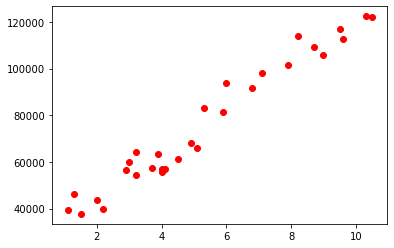

In [34]:
plt.scatter(x=data['YearsExperience'],y=data['Salary'],color='red');plt.plot(data['YearsExperience'],pred2,color='black')

# Prediction for multiple values

In [35]:
newdata=pd.Series([1,2.2,1.5,2,3,4,1.3,2.4,0.9])

In [36]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])

In [37]:
pred = model.predict(data_pred)
pred

0    35242.162520
1    46582.117306
2    39967.143681
3    44692.124842
4    54142.087163
5    63592.049484
6    38077.151217
7    48472.109770
8    34297.166288
dtype: float64

ValueError: x and y must have same first dimension, but have shapes (30,) and (9,)

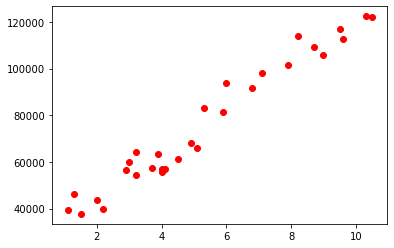

In [38]:
plt.scatter(x=data['YearsExperience'],y=data['Salary'],color='red');plt.plot(data['YearsExperience'],pred,color='black')

(array([6., 2., 4., 3., 6., 2., 1., 2., 2., 2.]),
 array([-1.37484017, -1.03957794, -0.70431572, -0.36905349, -0.03379126,
         0.30147096,  0.63673319,  0.97199542,  1.30725764,  1.64251987,
         1.9777821 ]),
 <BarContainer object of 10 artists>)

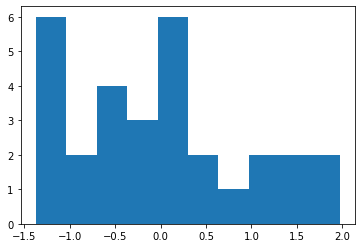

In [39]:
plt.hist(model.resid_pearson)